# Training

In [ ]:
# 512_padding_binary : 1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03

# 512_padding_multi : 1D8P-rrBKegZe_J7WLWqheYdadw4bZzEE

In [ ]:
# !gdown 1weHJqe9aGPH1I6bP1K7FzRglIcFfW1fH
# !gdown 17xTOcDDZPlmZTz4kn1oTozjt_mdulrNz
!gdown 1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03

Downloading...
From: https://drive.google.com/uc?id=1EcAeCLDTlHXf9jzBiSTbqIHMSF6WZC03
To: /content/512_padding_data_220722.zip
100% 59.5M/59.5M [00:00<00:00, 149MB/s]


In [ ]:
# !unzip /content/bin_train_data.zip
# !unzip /content/bin_valid_data.zip
!unzip /content/512_padding_data_220722.zip

In [ ]:
## Resize & Padding 한 3번폴더 ( = 이격 = Spacing ) 만 불러옴 

In [ ]:
!mkdir Dataset    # Train 폴더 생성 

In [ ]:
!cp -r /content/make_data/Train ./Dataset   # copy 후 Images 로 폴더 명 변경 

In [ ]:
!cp -r /content/make_data/Test ./Dataset    # copy 후 Masks 로 폴더 명 변경 

In [ ]:
!git clone https://github.com/msminhas93/DeepLabv3FineTuning.git

fatal: destination path 'DeepLabv3FineTuning' already exists and is not an empty directory.


In [ ]:
|# DeepLabv3FineTuning 안으로 Train 폴더 이동시켜주기

In [ ]:
##=================================================================

In [ ]:
# To run the code with the CrackForest dataset and store the results in folder called CFExp use the following command.
# CrackForest 는 reference code 에서 쓰인 Train 파일이다. 

# >>> python main.py --data-directory CrackForest --exp_directory CFExp    >>> CrackForest 부분을 우리 Train dataset으로 경로 수정
# >>> !python main.py --data-directory /content/DeepLabv3FineTuning/Train --exp_directory CFExp

In [ ]:
!ls

512_padding_data_220722.zip  DeepLabv3FineTuning  sample_data
Dataset			     make_data


In [ ]:
cd /content/DeepLabv3FineTuning

/content/DeepLabv3FineTuning


In [ ]:
!ls

Analysis.ipynb	environment.yml  README.md			Tests
CFExp		LICENSE.md	 requirements.txt		trainer.py
CrackForest	main.py		 segdataset.py
datahandler.py	model.py	 SegmentationDatasetDemo.ipynb


In [ ]:
import os
aaaa = os.listdir('/content/Dataset/Train/Images')
len(aaaa)

303

In [ ]:
!python main.py --data-directory /content/Dataset --exp_directory CFExp

In [ ]:
import numpy as np

np.float(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

# Inference

In [ ]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
# Load the trained model 
model = torch.load('./CFExp/weights.pt')
# Set the model to evaluate mode
model.eval()

In [ ]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./CFExp/log.csv')

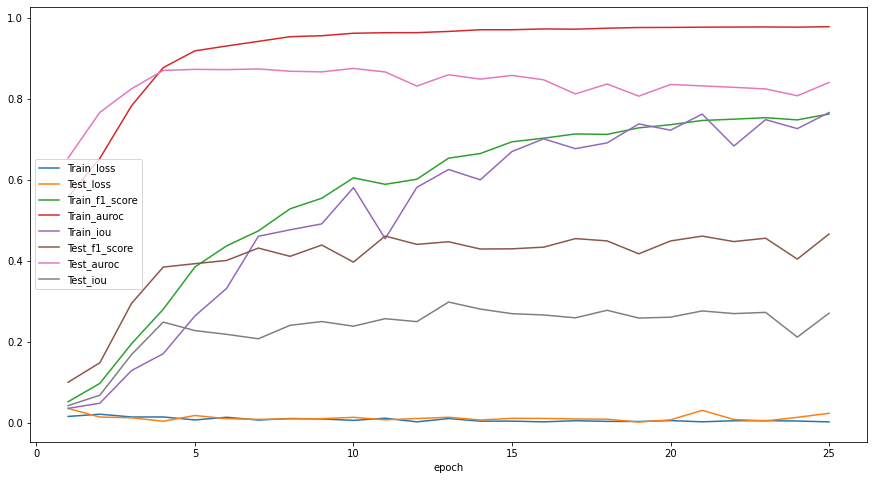

In [ ]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [ ]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.978442
Test_auroc     0.875268
dtype: float64


In [ ]:
ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread('/content/Dataset/Train/Images/a_012.jpg').transpose(2,0,1).reshape(1,3,512,512)
mask = cv2.imread('/content/Dataset/Train/Masks/a_012.jpg')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([1.08010e+04, 2.46764e+05, 2.45600e+03, 9.65000e+02, 5.12000e+02,
        2.51000e+02, 1.98000e+02, 1.01000e+02, 6.40000e+01, 3.20000e+01]),
 array([-0.12794788, -0.04186251,  0.04422287,  0.13030824,  0.21639362,
         0.302479  ,  0.38856438,  0.47464973,  0.5607351 ,  0.6468205 ,
         0.73290586], dtype=float32),
 <a list of 10 Patch objects>)

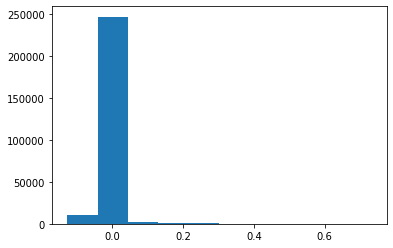

In [ ]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

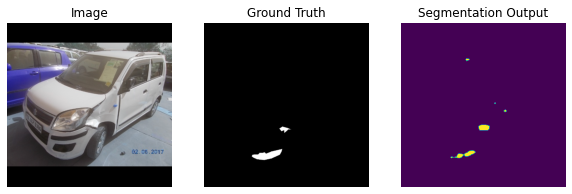

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.2);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./CFExp/SegmentationOutput.png',bbox_inches='tight')

In [ ]:
# !pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.6 MB 3.9 MB/s 
     |████████████████████████████████| 7.3 MB 24.1 MB/s 
     |████████████████████████████████| 25.9 MB 41.4 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
     |████████████████████████████████| 5.9 MB 23.7 MB/s 
     |████████████████████████████████| 70 kB 7.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstal